<a href="https://colab.research.google.com/github/Bouchrikator/sic-/blob/main/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [118]:
df=pd.read_csv('data_titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [119]:
dfa=df['Age'].mean()
df['Age'].fillna(dfa,inplace=True)
df.drop(columns='Cabin',inplace=True)
df.drop(columns='Ticket',inplace=True)
df['Embarked'].fillna('S',inplace=True)


In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [120]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mr",

                    "Master" :    "Master"

                    }
df2 = df['Name'].str.split(",",n=1, expand = True)
df['dj']=df2[0]
df['jd']=df2[1]

df2.drop(columns=0)
df3=df2[1].str.split(".",n=1, expand = True)
df['dj']=df3[0]
df['jd']=df3[1]
df3.drop(columns=1)

df.drop(columns=['Name','jd'],inplace=True)
df.rename(columns = {'dj':'Title_Dictionary'}, inplace = True)
df
df['Title_Dictionary'].replace({

                    " Capt":       "Officer",

                    " Col":        "Officer",

                    " Major":      "Officer",

                      " Dr":         "Officer",

                    " Rev":        "Officer",

                    " Jonkheer":   "Royalty",

                    " Don":        "Royalty",

                    " Sir" :       "Royalty",

                   " Lady" :      "Royalty",

                  " the Countess": "Royalty",

                    " Dona":       "Royalty",

                    " Mme":        "Miss",

                    " Mlle":       "Miss",

                    " Miss" :      "Miss",

                    " Ms":         "Mrs",

                    " Mr" :        "Mrs",

                    " Mrs" :       "Mr",

                    " Master" :    "Master"

                    },inplace=True)


In [121]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Dictionary
0,1,0,3,male,22.000000,1,0,7.2500,S,Mrs
1,2,1,1,female,38.000000,1,0,71.2833,C,Mr
2,3,1,3,female,26.000000,0,0,7.9250,S,Miss
3,4,1,1,female,35.000000,1,0,53.1000,S,Mr
4,5,0,3,male,35.000000,0,0,8.0500,S,Mrs
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S,Officer
887,888,1,1,female,19.000000,0,0,30.0000,S,Miss
888,889,0,3,female,29.699118,1,2,23.4500,S,Miss
889,890,1,1,male,26.000000,0,0,30.0000,C,Mrs


In [122]:
#Title_Dictionar={"Officer":1,"Royalty":2,"Miss":3,"Mrs":4,"Mr":5,"Master":6}

df['Embarked'].replace(['S', 'C','Q'],[0, 1, 2], inplace=True)
df['Title_Dictionary'].replace(['Mr', 'Mrs','Miss','Royalty','Officer','Master'],[0, 1, 2,3,4,5], inplace=True)

In [123]:
df['Sex'].replace(['male','female'],[0, 1], inplace=True)

In [109]:
df['Title_Dictionary'].unique()

array([1, 0, 2, 5, 3, 4])

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [125]:
x=df.drop(columns='Survived')
y=df['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)  

In [126]:
lgr = LogisticRegression()  
lgr.fit(x_train, y_train)  
y_pred  = lgr.predict(x_test)  


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [127]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.7596153846153846

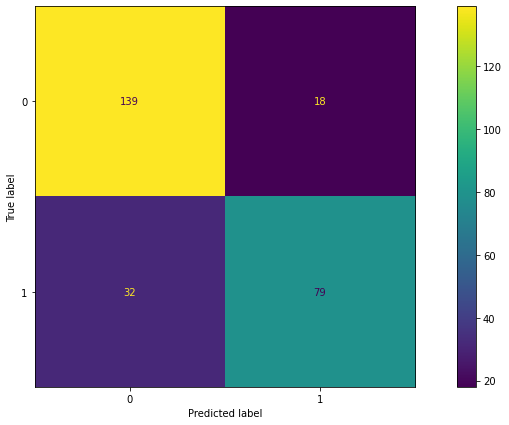

In [129]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=lgr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgr.classes_)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()

In [131]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, lgr.decision_function(x))

0.8599260750540588